
-----------------------------------------------------------------
                                            NHANES Diabetes Analysis - Data Processing Pipeline
-----------------------------------------------------------------

In [1]:

# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import set_option

# Import scikit-learn modules
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Configure display options
set_option('display.max_rows', 500)
set_option('display.max_columns', 500)

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

# NHANES Diabetes Data Analysis

## Project Overview

This notebook documents the comprehensive data analysis for a project investigating factors related to diabetes. Using data from the National Health and Nutrition Examination Survey (NHANES), we will:

1.  **Import and Merge** the relevant data files from different NHANES components.
2.  **Clean and Preprocess** the data, handling missing values and recoding variables according to the codebook specifications
3.  **Engineer New Features** to create more powerful predictors that capture clinical insights and interactions.
4.  **Perform Exploratory Data Analysis (EDA)** to understand distributions, correlations, and potential relationships.
5.  **Create Visualizations** to communicate key findings and patterns in the data.

This foundational work in data preparation, exploration, and feature engineering is essential for building effective predictive models in the next phase of the project.

**Data Source:** [NHANES Dataset on Kaggle](https://www.kaggle.com/datasets/cdc/national-health-and-nutrition-examination-survey/data)

Let's begin by importing the necessary libraries and then loading our data.

In [2]:


# Load NHANES dataset components
data_path = 'C:/Users/HP/Desktop/Porfolio/Portfolio/NHANES/diabetes_analysis/data/'

demographic = pd.read_csv(data_path + 'demographic.csv', encoding="latin1")
diet = pd.read_csv(data_path + 'diet.csv')
examination = pd.read_csv(data_path + 'examination.csv', encoding="latin1")
lab = pd.read_csv(data_path + 'labs.csv', encoding="latin1")
medication = pd.read_csv(data_path + 'medications.csv', encoding="latin1")
questionnaire = pd.read_csv(data_path + 'questionnaire.csv', encoding="latin1")

In [3]:


# Preview dataset structures
print("=== Dataset Previews ===")

print("\nDemographic Data (First 5 rows):")
demographic.head()

=== Dataset Previews ===

Demographic Data (First 5 rows):


,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,DMQMILIZ,DMQADFC,DMDBORN4,DMDCITZN,DMDYRSUS,DMDEDUC3,DMDEDUC2,DMDMARTL,RIDEXPRG,SIALANG,SIAPROXY,SIAINTRP,FIALANG,FIAPROXY,FIAINTRP,MIALANG,MIAPROXY,MIAINTRP,AIALANGA,DMDHHSIZ,DMDFMSIZ,DMDHHSZA,DMDHHSZB,DMDHHSZE,DMDHRGND,DMDHRAGE,DMDHRBR4,DMDHREDU,DMDHRMAR,DMDHSEDU,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
0,73557,8,2,1,69,NaN,4,4,1.0,NaN,1.0,1.0,1,1.0,NaN,NaN,3.0,4.0,NaN,1,2.0,2,1.0,2.0,2.0,1.0,2.0,2.0,1.0,3,3,0,0,2,1,69,1.0,3.0,4.0,NaN,13281.237386,13481.042095,1,112,4.0,4.0,0.84
1,73558,8,2,1,54,NaN,3,3,1.0,NaN,2.0,NaN,1,1.0,NaN,NaN,3.0,1.0,NaN,1,2.0,2,1.0,2.0,2.0,1.0,2.0,2.0,1.0,4,4,0,2,0,1,54,1.0,3.0,1.0,1.0,23682.057386,24471.769625,1,108,7.0,7.0,1.78
2,73559,8,2,1,72,NaN,3,3,2.0,NaN,1.0,1.0,1,1.0,NaN,NaN,4.0,1.0,NaN,1,2.0,2,1.0,2.0,2.0,1.0,2.0,2.0,NaN,2,2,0,0,2,1,72,1.0,4.0,1.0,3.0,57214.803319,57193.285376,1,109,10.0,10.0,4.51
3,73560,8,2,1,9,NaN,3,3,1.0,119.0,NaN,NaN,1,1.0,NaN,3.0,NaN,NaN,NaN,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,1.0,4,4,0,2,0,1,33,1.0,3.0,1.0,4.0,55201.178592,55766.512438,2,109,9.0,9.0,2.52
4,73561,8,2,2,73,NaN,3,3,1.0,NaN,2.0,NaN,1,1.0,NaN,NaN,5.0,1.0,NaN,1,2.0,2,1.0,2.0,2.0,1.0,2.0,2.0,NaN,2,2,0,0,2,1,78,1.0,5.0,1.0,5.0,63709.667069,65541.871229,2,116,15.0,15.0,5.00


In [4]:

# Display the first 5 rows of the Diet dataset
print("\nDiet Data (First 5 rows):")
diet.head()


Diet Data (First 5 rows):


,SEQN,WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,DR1MNRSP,DR1HELPD,DBQ095Z,DBD100,DRQSPREP,DR1STY,DR1SKY,DRQSDIET,DRQSDT1,DRQSDT2,DRQSDT3,DRQSDT4,DRQSDT5,DRQSDT6,DRQSDT7,DRQSDT8,DRQSDT9,DRQSDT10,DRQSDT11,DRQSDT12,DRQSDT91,DR1TNUMF,DR1TKCAL,DR1TPROT,DR1TCARB,DR1TSUGR,DR1TFIBE,DR1TTFAT,DR1TSFAT,DR1TMFAT,DR1TPFAT,DR1TCHOL,DR1TATOC,DR1TATOA,DR1TRET,DR1TVARA,DR1TACAR,DR1TBCAR,DR1TCRYP,DR1TLYCO,DR1TLZ,DR1TVB1,DR1TVB2,DR1TNIAC,DR1TVB6,DR1TFOLA,DR1TFA,DR1TFF,DR1TFDFE,DR1TCHL,DR1TVB12,DR1TB12A,DR1TVC,DR1TVD,DR1TVK,DR1TCALC,DR1TPHOS,DR1TMAGN,DR1TIRON,DR1TZINC,DR1TCOPP,DR1TSODI,DR1TPOTA,DR1TSELE,DR1TCAFF,DR1TTHEO,DR1TALCO,DR1TMOIS,DR1TS040,DR1TS060,DR1TS080,DR1TS100,DR1TS120,DR1TS140,DR1TS160,DR1TS180,DR1TM161,DR1TM181,DR1TM201,DR1TM221,DR1TP182,DR1TP183,DR1TP184,DR1TP204,DR1TP205,DR1TP225,DR1TP226,DR1.300,DR1.320Z,DR1.330Z,DR1BWATZ,DR1TWS,DRD340,DRD350A,DRD350AQ,DRD350B,DRD350BQ,DRD350C,DRD350CQ,DRD350D,DRD350DQ,DRD350E,DRD350EQ,DRD350F,DRD350FQ,DRD350G,DRD350GQ,DRD350H,DRD350HQ,DRD350I,DRD350IQ,DRD350J,DRD350JQ,DRD350K,DRD360,DRD370A,DRD370AQ,DRD370B,DRD370BQ,DRD370C,DRD370CQ,DRD370D,DRD370DQ,DRD370E,DRD370EQ,DRD370F,DRD370FQ,DRD370G,DRD370GQ,DRD370H,DRD370HQ,DRD370I,DRD370IQ,DRD370J,DRD370JQ,DRD370K,DRD370KQ,DRD370L,DRD370LQ,DRD370M,DRD370MQ,DRD370N,DRD370NQ,DRD370O,DRD370OQ,DRD370P,DRD370PQ,DRD370Q,DRD370QQ,DRD370R,DRD370RQ,DRD370S,DRD370SQ,DRD370T,DRD370TQ,DRD370U,DRD370UQ,DRD370V
0,73557,16888.327864,12930.890649,1,49.0,2.0,2.0,6.0,2.0,1.0,1.0,13.0,3.0,2.0,4.0,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,1574.0,43.63,239.59,176.47,10.8,52.81,17.819,18.493,8.829,209.0,3.92,0.0,70.0,110.0,60.0,304.0,278.0,1398.0,430.0,1.057,1.216,11.804,0.951,285.0,66.0,219.0,330.0,216.3,2.79,0.00,241.4,3.3,29.2,949.0,756.0,206.0,8.41,8.85,1.072,1323.0,2228.0,62.5,203.0,36.0,0.0,2701.79,0.219,0.099,0.103,0.153,0.346,1.221,9.694,5.408,1.173,16.796,0.121,0.001,7.932,0.769,0.000,0.094,0.001,0.000,0.010,2.0,960.0,960.0,0.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,73558,17932.143865,12684.148869,1,59.0,2.0,2.0,4.0,1.0,1.0,1.0,13.0,1.0,2.0,3.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,5062.0,338.13,423.78,44.99,16.7,124.29,53.408,35.481,20.505,2584.0,20.94,0.0,1477.0,1488.0,0.0,145.0,12.0,0.0,899.0,4.178,5.168,65.396,4.415,1243.0,601.0,641.0,1662.0,2149.0,21.45,0.00,2.3,15.2,23.4,3193.0,6427.0,903.0,26.88,30.36,4.130,9726.0,4930.0,715.8,240.0,0.0,119.0,6779.99,1.872,1.160,0.802,1.286,1.297,6.516,27.952,12.107,2.208,32.429,0.086,0.000,15.483,1.774,0.007,0.728,1.003,0.104,1.139,2.0,360.0,360.0,0.0,1.0,1.0,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,1.0,1.0,1.0,1.0,2.0,NaN,2.0,NaN,2.0,1.0,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,1.0,1.0,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0
2,73559,59641.812930,39394.236709,1,49.0,2.0,2.0,18.0,6.0,1.0,1.0,13.0,1.0,1.0,2.0,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,27.0,1743.0,64.61,224.39,102.90,9.9,65.97,25.263,20.902,12.953,88.0,8.87,0.0,616.0,655.0,21.0,449.0,35.0,515.0,300.0,1.648,1.747,18.342,1.906,423.0,290.0,133.0,625.0,161.2,3.78,1.42,195.1,4.0,40.4,877.0,1198.0,210.0,17.57,8.98,0.949,2943.0,1694.0,98.3,45.0,71.0,0.0,3766.70,0.358,0.128,0.371,0.455,3.008,2.067,10.691,7.497,0.531,19.910,0.164,0.005,11.705,1.092,0.000,0.042,0.001,0.006,0.002,2.0,1254.0,0.0,1254.0,1.0,1.0,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,1.0,1.0,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,73560,142203.069917,125966.366442,1,54.0,2.0,2.0,21.0,3.0,1.0,1.0,12.0,1.0,1.0,3.0,2.0,

In [5]:

# Display the first 5 rows of the Examination dataset
print("\nExamination Data (First 5 rows):")
examination.head()


Examination Data (First 5 rows):


,SEQN,PEASCST1,PEASCTM1,PEASCCT1,BPXCHR,BPAARM,BPACSZ,BPXPLS,BPXPULS,BPXPTY,BPXML1,BPXSY1,BPXDI1,BPAEN1,BPXSY2,BPXDI2,BPAEN2,BPXSY3,BPXDI3,BPAEN3,BPXSY4,BPXDI4,BPAEN4,BMDSTATS,BMXWT,BMIWT,BMXRECUM,BMIRECUM,BMXHEAD,BMIHEAD,BMXHT,BMIHT,BMXBMI,BMDBMIC,BMXLEG,BMILEG,BMXARML,BMIARML,BMXARMC,BMIARMC,BMXWAIST,BMIWAIST,BMXSAD1,BMXSAD2,BMXSAD3,BMXSAD4,BMDAVSAD,BMDSADCM,MGDEXSTS,MGD050,MGD060,MGQ070,MGQ080,MGQ090,MGQ100,MGQ110,MGQ120,MGD130,MGQ90DG,MGDSEAT,MGAPHAND,MGATHAND,MGXH1T1,MGXH1T1E,MGXH2T1,MGXH2T1E,MGXH1T2,MGXH1T2E,MGXH2T2,MGXH2T2E,MGXH1T3,MGXH1T3E,MGXH2T3,MGXH2T3E,MGDCGSZ,OHDEXSTS,OHDDESTS,OHXIMP,OHX01TC,OHX02TC,OHX03TC,OHX04TC,OHX05TC,OHX06TC,OHX07TC,OHX08TC,OHX09TC,OHX10TC,OHX11TC,OHX12TC,OHX13TC,OHX14TC,OHX15TC,OHX16TC,OHX17TC,OHX18TC,OHX19TC,OHX20TC,OHX21TC,OHX22TC,OHX23TC,OHX24TC,OHX25TC,OHX26TC,OHX27TC,OHX28TC,OHX29TC,OHX30TC,OHX31TC,OHX32TC,OHX02CTC,OHX03CTC,OHX04CTC,OHX05CTC,OHX06CTC,OHX07CTC,OHX08CTC,OHX09CTC,OHX10CTC,OHX11CTC,OHX12CTC,OHX13CTC,OHX14CTC,OHX15CTC,OHX18CTC,OHX19CTC,OHX20CTC,OHX21CTC,OHX22CTC,OHX23CTC,OHX24CTC,OHX25CTC,OHX26CTC,OHX27CTC,OHX28CTC,OHX29CTC,OHX30CTC,OHX31CTC,OHX02CSC,OHX03CSC,OHX04CSC,OHX05CSC,OHX06CSC,OHX07CSC,OHX08CSC,OHX09CSC,OHX10CSC,OHX11CSC,OHX12CSC,OHX13CSC,OHX14CSC,OHX15CSC,OHX18CSC,OHX19CSC,OHX20CSC,OHX21CSC,OHX22CSC,OHX23CSC,OHX24CSC,OHX25CSC,OHX26CSC,OHX27CSC,OHX28CSC,OHX29CSC,OHX30CSC,OHX31CSC,OHX02SE,OHX03SE,OHX04SE,OHX05SE,OHX07SE,OHX10SE,OHX12SE,OHX13SE,OHX14SE,OHX15SE,OHX18SE,OHX19SE,OHX20SE,OHX21SE,OHX28SE,OHX29SE,OHX30SE,OHX31SE,CSXEXSTS,CSXEXCMT,CSQ245,CSQ241,CSQ260A,CSQ260D,CSQ260G,CSQ260I,CSQ260N,CSQ260M,CSQ270,CSQ450,CSQ460,CSQ470,CSQ480,CSQ490,CSXQUIPG,CSXQUIPT,CSXNAPG,CSXNAPT,CSXQUISG,CSXQUIST,CSXSLTSG,CSXSLTST,CSXNASG,CSXNAST,CSXTSEQ,CSXCHOOD,CSXSBOD,CSXSMKOD,CSXLEAOD,CSXSOAOD,CSXGRAOD,CSXONOD,CSXNGSOD,CSXSLTRT,CSXSLTRG,CSXNART,CSXNARG,CSAEFFRT
0,73557,1,620.0,NaN,NaN,1.0,4.0,86.0,1.0,1.0,140.0,122.0,72.0,2.0,114.0,76.0,2.0,102.0,74.0,2.0,NaN,NaN,NaN,1,78.3,NaN,NaN,NaN,NaN,NaN,171.3,NaN,26.7,NaN,39.2,NaN,40.2,NaN,35.3,NaN,100.0,NaN,20.5,20.6,NaN,NaN,20.6,NaN,1.0,2.0,NaN,2.0,NaN,NaN,2.0,NaN,NaN,1.0,1.0,1.0,1.0,2.0,18.3,1.0,27.5,1.0,20.7,1.0,32.4,1.0,21.8,1.0,33.4,1.0,55.2,1.0,1.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,35.0,54.0,35.0,20.0,55.0,15.0,4.0,50.0,1.0,50.0,2.0,65.0,1.0,60.0,1.0,B,2.0,4.0,3.0,2.0,1.0,1.0,1.0,4.0,62.0,1.0,NaN,NaN,1.0
1,73558,1,766.0,NaN,NaN,1.0,4.0,74.0,1.0,1.0,170.0,156.0,62.0,2.0,160.0,80.0,2.0,156.0,42.0,2.0,NaN,NaN,NaN,1,89.5,NaN,NaN,NaN,NaN,NaN,176.8,NaN,28.6,NaN,40.0,NaN,41.5,NaN,34.7,NaN,107.6,NaN,24.2,24.5,NaN,NaN,24.4,NaN,1.0,2.0,NaN,1.0,2.0,2.0,2.0,NaN,NaN,1.0,1.0,1.0,1.0,2.0,32.5,1.0,27.8,1.0,31.3,1.0,29.0,1.0,30.1,1.0,22.5,1.0,61.5,1.0,1.0,2.0,4.0,2.0,5.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0,4.0,4.0,4.0,5.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0,4.0,4.0,Z,J,S,S,S,S,S,S,S,S,S,Z,Z,Z,E,E,J,S,S,S,S,S,S,S,Z,S,E,E,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.0,1234.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,30.0,40.0,36.0,17.0,51.0,1.0,4.0,5.0,4.0,57.0,2.0,33.0,1.0,27.0,1.0,A,2.0,1.0,3.0,3.0,1.0,2.0,3.0,4.0,28.0,1.0,NaN,NaN,1.0
2,73559,1,665.0,NaN,NaN,1.0,4.0,68.0,1.0,1.0,160.0,140.0,90.0,2.0,140.0,76.0,2.0,146.0,80.0,2.0,NaN,NaN,NaN,1,88.9,NaN,NaN,NaN,NaN,NaN,175.3,NaN,28.9,NaN,40.0,NaN,41.0,NaN,33.5,NaN,109.2,NaN,25.8,25.4,NaN,NaN,25.6,NaN,1.0,2.0,NaN,2.0,NaN,NaN,2.0,NaN,NaN,3.0,1.0,1.0,1.0,2.0,43.1,1.0,45.7,1.0,42.9,1.0,47.9,1.0,41.9,1.0,46.9,1.0,91.0,1.0,1.0,2.0,4.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0

In [6]:

# Display the first 5 rows of the Lab dataset
print("\nLab Data (First 5 rows):")
lab.head()


Lab Data (First 5 rows):


,SEQN,URXUMA,URXUMS,URXUCR.x,URXCRS,URDACT,WTSAF2YR.x,LBXAPB,LBDAPBSI,LBXSAL,LBDSALSI,LBXSAPSI,LBXSASSI,LBXSATSI,LBXSBU,LBDSBUSI,LBXSC3SI,LBXSCA,LBDSCASI,LBXSCH,LBDSCHSI,LBXSCK,LBXSCLSI,LBXSCR,LBDSCRSI,LBXSGB,LBDSGBSI,LBXSGL,LBDSGLSI,LBXSGTSI,LBXSIR,LBDSIRSI,LBXSKSI,LBXSLDSI,LBXSNASI,LBXSOSSI,LBXSPH,LBDSPHSI,LBXSTB,LBDSTBSI,LBXSTP,LBDSTPSI,LBXSTR,LBDSTRSI,LBXSUA,LBDSUASI,LBXWBCSI,LBXLYPCT,LBXMOPCT,LBXNEPCT,LBXEOPCT,LBXBAPCT,LBDLYMNO,LBDMONO,LBDNENO,LBDEONO,LBDBANO,LBXRBCSI,LBXHGB,LBXHCT,LBXMCVSI,LBXMCHSI,LBXMC,LBXRDW,LBXPLTSI,LBXMPSI,URXUCL,WTSA2YR.x,LBXSCU,LBDSCUSI,LBXSSE,LBDSSESI,LBXSZN,LBDSZNSI,URXUCR.y,WTSB2YR.x,URXBP3,URDBP3LC,URXBPH,URDBPHLC,URXBPF,URDBPFLC,URXBPS,URDBPSLC,URXTLC,URDTLCLC,URXTRS,URDTRSLC,URXBUP,URDBUPLC,URXEPB,URDEPBLC,URXMPB,URDMPBLC,URXPPB,URDPPBLC,URX14D,URD14DLC,URXDCB,URDDCBLC,URXUCR,PHQ020,PHACOFHR,PHACOFMN,PHQ030,PHAALCHR,PHAALCMN,PHQ040,PHAGUMHR,PHAGUMMN,PHQ050,PHAANTHR,PHAANTMN,PHQ060,PHASUPHR,PHASUPMN,PHAFSTHR.x,PHAFSTMN.x,PHDSESN,LBDPFL,LBDWFL,LBDHDD,LBDHDDSI,LBXHA,LBXHBS,LBXHBC,LBDHBG,LBDHD,LBXHCR,LBXHCG,LBDHEG,LBDHEM,LBXHE1,LBXHE2,LBXGH,LBDHI,ORXGH,ORXGL,ORXH06,ORXH11,ORXH16,ORXH18,ORXH26,ORXH31,ORXH33,ORXH35,ORXH39,ORXH40,ORXH42,ORXH45,ORXH51,ORXH52,ORXH53,ORXH54,ORXH55,ORXH56,ORXH58,ORXH59,ORXH61,ORXH62,ORXH64,ORXH66,ORXH67,ORXH68,ORXH69,ORXH70,ORXH71,ORXH72,ORXH73,ORXH81,ORXH82,ORXH83,ORXH84,ORXHPC,ORXHPI,ORXHPV,LBDRPCR.x,LBDRHP.x,LBDRLP.x,LBDR06.x,LBDR11.x,LBDR16.x,LBDR18.x,LBDR26.x,LBDR31.x,LBDR33.x,LBDR35.x,LBDR39.x,LBDR40.x,LBDR42.x,LBDR45.x,LBDR51.x,LBDR52.x,LBDR53.x,LBDR54.x,LBDR55.x,LBDR56.x,LBDR58.x,LBDR59.x,LBDR61.x,LBDR62.x,LBDR64.x,LBDR66.x,LBDR67.x,LBDR68.x,LBDR69.x,LBDR70.x,LBDR71.x,LBDR72.x,LBDR73.x,LBDR81.x,LBDR82.x,LBDR83.x,LBDR84.x,LBDR89.x,LBDRPI.x,LBXHP2C,LBDRPCR.y,LBDRHP.y,LBDRLP.y,LBDR06.y,LBDR11.y,LBDR16.y,LBDR18.y,LBDR26.y,LBDR31.y,LBDR33.y,LBDR35.y,LBDR39.y,LBDR40.y,LBDR42.y,LBDR45.y,LBDR51.y,LBDR52.y,LBDR53.y,LBDR54.y,LBDR55.y,LBDR56.y,LBDR58.y,LBDR59.y,LBDR61.y,LBDR62.y,LBDR64.y,LBDR66.y,LBDR67.y,LBDR68.y,LBDR69.y,LBDR70.y,LBDR71.y,LBDR72.y,LBDR73.y,LBDR81.y,LBDR82.y,LBDR83.y,LBDR84.y,LBDR89.y,LBDRPI.y,WTSAF2YR.y,LBXIN,LBDINSI,PHAFSTHR.y,PHAFSTMN.y,URXUIO,WTSAF2YR,LBXTR,LBDTRSI,LBDLDL,LBDLDLSI,WTSH2YR.x,LBXIHG,LBDIHGSI,LBDIHGLC,LBXBGE,LBDBGELC,LBXBGM,LBDBGMLC,WTSOG2YR,LBXGLT,LBDGLTSI,GTDSCMMN,GTDDR1MN,GTDBL2MN,GTDDR2MN,GTXDRANK,PHAFSTHR,PHAFSTMN,GTDCODE,WTSA2YR.y,URXP01,URDP01LC,URXP02,URDP02LC,URXP03,URDP03LC,URXP04,URDP04LC,URXP06,URDP06LC,URXP10,URDP10LC,URXP25,URDP25LC,WTSA2YR,URXUP8,URDUP8LC,URXNO3,URDNO3LC,URXSCN,URDSCNLC,WTSB2YR.y,LBXPFDE,LBDPFDEL,LBXPFHS,LBDPFHSL,LBXMPAH,LBDMPAHL,LBXPFBS,LBDPFBSL,LBXPFHP,LBDPFHPL,LBXPFNA,LBDPFNAL,LBXPFUA,LBDPFUAL,LBXPFDO,LBDPFDOL,WTSB2YR,URXCNP,URDCNPLC,URXCOP,URDCOPLC,URXECP,URDECPLC,URXMBP,URDMBPLC,URXMC1,URDMC1LC,URXMEP,URDMEPLC,URXMHH,URDMHHLC,URXMHNC,URDMCHLC,URXMHP,URDMHPLC,URXMIB,URDMIBLC,URXMNP,URDMNPLC,URXMOH,URDMOHLC,URXMZP,URDMZPLC,LBXTC,LBDTCSI,LBXTTG,LBXEMA,WTSH2YR.y,LBXBPB,LBDBPBSI,LBDBPBLC,LBXBCD,LBDBCDSI,LBDBCDLC,LBXTHG,LBDTHGSI,LBDTHGLC,LBXBSE,LBDBSESI,LBDBSELC,LBXBMN,LBDBMNSI,LBDBMNLC,URXUTRI,URXUAS3,URDUA3LC,URXUAS5,URDUA5LC,URXUAB,URDUABLC,URXUAC,URDUACLC,URXUDMA,URDUDALC,URXUMMA,URDUMMAL,URXVOL1,URDFLOW1,URXVOL2,URDFLOW2,URXVOL3,URDFLOW3,URXUHG,URDUHGLC,URXUBA,URDUBALC,URXUCD,URDUCDLC,URXUCO,URDUCOLC,URXUCS,URDUCSLC,URXUMO,URDUMOLC,URXUMN,URDUMNLC,URXUPB,URDUPBLC,URXUSB,URDUSBLC,URXUSN,URDUSNLC,URXUSR,URDUSRLC,URXUTL,URDUTLLC,URXUTU,URDUTULC,URXUUR,URDUURLC,URXPREG,URXUAS,LBDB12,LBDB12SI
0,73557,4.3,4.3,39.0,3447.6,11.03,NaN,NaN,NaN,4.1,41.0,129.0,16.0,16.0,10.0,3.57,27.0,9.5,2.375,168.0,4.344,174.0,97.0,1.21,106.96,2.4,24.0,554.0,30.75,16.0,58.0,10.4,4.3,118.0,136.0,296.0,4.3,1.388,0.8,13.68,6.5,65.0,140.0,1.581,3.3,196.3,4.7,42.2,11.0,42.3,3.4,1.2,2.0,0.5,2.0,0.2,0.1,5.09,15.2,45.4,89.3,29.9,33.4,14.0,204.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,2.0

In [7]:

# Display the first 5 rows of the Medication dataset
print("\nMedication Data (First 5 rows):")
medication.head()


Medication Data (First 5 rows):


,SEQN,RXDUSE,RXDDRUG,RXDDRGID,RXQSEEN,RXDDAYS,RXDRSC1,RXDRSC2,RXDRSC3,RXDRSD1,RXDRSD2,RXDRSD3,RXDCOUNT
0,73557,1,99999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
1,73557,1,INSULIN,d00262,2.0,1460.0,E11,NaN,NaN,Type 2 diabetes mellitus,NaN,NaN,2.0
2,73558,1,GABAPENTIN,d03182,1.0,243.0,G25.81,NaN,NaN,Restless legs syndrome,NaN,NaN,4.0
3,73558,1,INSULIN GLARGINE,d04538,1.0,365.0,E11,NaN,NaN,Type 2 diabetes mellitus,NaN,NaN,4.0
4,73558,1,OLMESARTAN,d04801,1.0,14.0,E11.2,NaN,NaN,Type 2 diabetes mellitus with kidney complicat...,NaN,NaN,4.0


In [8]:

# Display the first 5 rows of the Questionnaire dataset
print("\nQuestionnaire Data (First 5 rows):")
questionnaire.head()


Questionnaire Data (First 5 rows):


,SEQN,ACD011A,ACD011B,ACD011C,ACD040,ACD110,ALQ101,ALQ110,ALQ120Q,ALQ120U,ALQ130,ALQ141Q,ALQ141U,ALQ151,ALQ160,BPQ020,BPQ030,BPD035,BPQ040A,BPQ050A,BPQ056,BPD058,BPQ059,BPQ080,BPQ060,BPQ070,BPQ090D,BPQ100D,CBD070,CBD090,CBD110,CBD120,CBD130,HSD010,HSQ500,HSQ510,HSQ520,HSQ571,HSQ580,HSQ590,HSAQUEX,CSQ010,CSQ020,CSQ030,CSQ040,CSQ060,CSQ070,CSQ080,CSQ090A,CSQ090B,CSQ090C,CSQ090D,CSQ100,CSQ110,CSQ120A,CSQ120B,CSQ120C,CSQ120D,CSQ120E,CSQ120F,CSQ120G,CSQ120H,CSQ140,CSQ160,CSQ170,CSQ180,CSQ190,CSQ200,CSQ202,CSQ204,CSQ210,CSQ220,CSQ240,CSQ250,CSQ260,AUQ136,AUQ138,CDQ001,CDQ002,CDQ003,CDQ004,CDQ005,CDQ006,CDQ009A,CDQ009B,CDQ009C,CDQ009D,CDQ009E,CDQ009F,CDQ009G,CDQ009H,CDQ008,CDQ010,DIQ010,DID040,DIQ160,DIQ170,DIQ172,DIQ175A,DIQ175B,DIQ175C,DIQ175D,DIQ175E,DIQ175F,DIQ175G,DIQ175H,DIQ175I,DIQ175J,DIQ175K,DIQ175L,DIQ175M,DIQ175N,DIQ175O,DIQ175P,DIQ175Q,DIQ175R,DIQ175S,DIQ175T,DIQ175U,DIQ175V,DIQ175W,DIQ175X,DIQ180,DIQ050,DID060,DIQ060U,DIQ070,DIQ230,DIQ240,DID250,DID260,DIQ260U,DIQ275,DIQ280,DIQ291,DIQ300S,DIQ300D,DID310S,DID310D,DID320,DID330,DID341,DID350,DIQ350U,DIQ360,DIQ080,DBQ010,DBD030,DBD041,DBD050,DBD055,DBD061,DBQ073A,DBQ073B,DBQ073C,DBQ073D,DBQ073E,DBQ073U,DBQ700,DBQ197,DBQ223A,DBQ223B,DBQ223C,DBQ223D,DBQ223E,DBQ223U,DBQ229,DBQ235A,DBQ235B,DBQ235C,DBQ301,DBQ330,DBQ360,DBQ370,DBD381,DBQ390,DBQ400,DBD411,DBQ421,DBQ424,DBD895,DBD900,DBD905,DBD910,CBQ596,CBQ606,CBQ611,CBQ505,CBQ535,CBQ540,CBQ545,CBQ550,CBQ552,CBQ580,CBQ585,CBQ590,DED031,DEQ034A,DEQ034C,DEQ034D,DEQ038G,DEQ038Q,DED120,DED125,DLQ010,DLQ020,DLQ040,DLQ050,DLQ060,DLQ080,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,DPQ100,DUQ200,DUQ210,DUQ211,DUQ213,DUQ215Q,DUQ215U,DUQ217,DUQ219,DUQ220Q,DUQ220U,DUQ230,DUQ240,DUQ250,DUQ260,DUQ270Q,DUQ270U,DUQ272,DUQ280,DUQ290,DUQ300,DUQ310Q,DUQ310U,DUQ320,DUQ330,DUQ340,DUQ350Q,DUQ350U,DUQ352,DUQ360,DUQ370,...,PAQ755,PAQ759A,PAQ759B,PAQ759C,PAQ759D,PAQ759E,PAQ759F,PAQ759G,PAQ759H,PAQ759I,PAQ759J,PAQ759K,PAQ759L,PAQ759M,PAQ759N,PAQ759O,PAQ759P,PAQ759Q,PAQ759R,PAQ759S,PAQ759T,PAQ759U,PAQ759V,PAQ762,PAQ764,PAQ766,PAQ679,PAQ750,PAQ770,PAQ772A,PAQ772B,PAQ772C,PAAQUEX,PUQ100,PUQ110,RHQ010,RHQ020,RHQ031,RHD043,RHQ060,RHQ070,RHQ074,RHQ076,RHQ078,RHQ131,RHD143,RHQ160,RHQ162,RHQ163,RHQ166,RHQ169,RHQ172,RHD173,RHQ171,RHD180,RHD190,RHQ197,RHQ200,RHD280,RHQ291,RHQ305,RHQ332,RHQ420,RHQ540,RHQ542A,RHQ542B,RHQ542C,RHQ542D,RHQ554,RHQ560Q,RHQ560U,RHQ570,RHQ576Q,RHQ576U,RHQ580,RHQ586Q,RHQ586U,RHQ596,RHQ602Q,RHQ602U,RXQ510,RXQ515,RXQ520,RXQ525G,RXQ525Q,RXQ525U,RXD530,SLD010H,SLQ050,SLQ060,SMQ020,SMD030,SMQ040,SMQ050Q,SMQ050U,SMD055,SMD057,SMQ078,SMD641,SMD650,SMD093,SMDUPCA,SMD100BR,SMD100FL,SMD100MN,SMD100LN,SMD100TR,SMD100NI,SMD100CO,SMQ621,SMD630,SMQ661,SMQ665A,SMQ665B,SMQ665C,SMQ665D,SMQ670,SMQ848,SMQ852Q,SMQ852U,SMAQUEX2,SMD460,SMD470,SMD480,SMQ856,SMQ858,SMQ860,SMQ862,SMQ866,SMQ868,SMQ870,SMQ872,SMQ874,SMQ876,SMQ878,SMQ880,SMAQUEX.x,SMQ681,SMQ690A,SMQ710,SMQ720,SMQ725,SMQ690B,SMQ740,SMQ690C,SMQ770,SMQ690G,SMQ845,SMQ690H,SMQ849,SMQ851,SMQ690D,SMQ800,SMQ690E,SMQ817,SMQ690I,SMQ857,SMQ690J,SMQ861,SMQ863,SMQ690F,SMQ830,SMQ840,SMDANY,SMAQUEX.y,SXD021,SXQ800,SXQ803,SXQ806,SXQ809,SXQ700,SXQ703,SXQ706,SXQ709,SXD031,SXD171,SXD510,SXQ824,SXQ827,SXD633,SXQ636,SXQ639,SXD642,SXQ410,SXQ550,SXQ836,SXQ841,SXQ853,SXD621,SXQ624,SXQ627,SXD630,SXQ645,SXQ648,SXQ610,SXQ251,SXQ590,SXQ600,SXD101,SXD450,SXQ724,SXQ727,SXQ130,SXQ490,SXQ741,SXQ753,SXQ260,SXQ265,SXQ267,SXQ270,SXQ272,SXQ280,SXQ292,SXQ294,WHD010,WHD020,WHQ030,WHQ040,WHD050,WHQ060,WHQ070,WHD080A,WHD080B,WHD080C,WHD080D,WHD080E,WHD080F,WHD080G,WHD080H,WHD080I,WHD080J,WHD080K,WHD080M,WHD080N,WHD080O,WHD080P,WHD080Q,WHD080R,WHD080S,WHD080T,WHD080U,WHD080L,WHD110,WHD120,WHD130,WHD140,WHQ150,WHQ030M,WHQ500,WHQ520
0,73557,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,3.0,1.0,0.0,NaN,1.0,NaN,1.0,1.0,62.0,1.0,2.0,2.0,NaN,2.0,1.0,NaN,1.0,1.0,1.0,300.0,0.0,50.0,0.0,85.0,2.0,2.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,3.0,2.0,2.0,NaN,NaN,2.0,3.0,3.0,3.0,3.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,2.0,2.0,2.0,2.

In [9]:


# Dataset summaries
print("\n" + "="*50)
print("DATASET SUMMARIES")
print("="*50)

datasets = {
    'questionnaire': questionnaire,
    'medication': medication,
    'lab': lab,
    'examination': examination,
    'diet': diet,
    'demographic': demographic
}

for name, dataset in datasets.items():
    print(f"\n{name.upper()} Overview:")
    print(f"Shape: {dataset.shape}")
    print("Unique values per column:")
    print(dataset.nunique().head(10))


DATASET SUMMARIES

QUESTIONNAIRE Overview:
Shape: (10175, 953)
Unique values per column:
SEQN       10175
ACD011A        1
ACD011B        1
ACD011C        1
ACD040         7
ACD110         5
ALQ101         3
ALQ110         3
ALQ120Q       44
ALQ120U        3
dtype: int64

MEDICATION Overview:
Shape: (20194, 13)
Unique values per column:
SEQN        10175
RXDUSE          4
RXDDRUG       699
RXDDRGID      696
RXQSEEN         3
RXDDAYS       123
RXDRSC1       473
RXDRSC2       155
RXDRSC3        43
RXDRSD1       470
dtype: int64

LAB Overview:
Shape: (9813, 424)
Unique values per column:
SEQN          9813
URXUMA         628
URXUMS         628
URXUCR.x       408
URXCRS         408
URDACT        2853
WTSAF2YR.x    2799
LBXAPB         155
LBDAPBSI       155
LBXSAL          31
dtype: int64

EXAMINATION Overview:
Shape: (9813, 224)
Unique values per column:
SEQN        9813
PEASCST1       3
PEASCTM1    1155
PEASCCT1      12
BPXCHR        58
BPAARM         3
BPACSZ         5
BPXPLS        50


In [10]:


# Select relevant features from each dataset
print("\nSelecting relevant features for analysis...")

demographic_cols = demographic[[
    "SEQN",        # Respondent sequence number (unique participant ID)
    "RIDAGEYR",    # Age in years
    "RIAGENDR",    # Gender
    "RIDRETH3",    # Race/Ethnicity
    "DMDEDUC2",    # Education Level
    "INDHHIN2"     # Household Income
]]

examination_cols = examination[[
    "SEQN",        # Respondent sequence number
    "BMXBMI",      # Body Mass Index
    "BMXWAIST",    # Waist Circumference
    "BPXSY1",      # Systolic BP
    "BPXDI1"       # Diastolic BP
]]

lab_cols = lab[[
    "SEQN",        # Respondent sequence number
    "LBXGLT",      # 2-Hr Glucose
    "LBDHDD",      # HDL Cholesterol
    "LBXTR"        # Triglycerides
]]

questionnaire_cols = questionnaire[[
    "SEQN",        # Respondent sequence number
    "DIQ010",      # Doctor's diagnosis of diabetes
    "MCQ300C"      # Family History
]]


Selecting relevant features for analysis...


In [11]:


# Merge datasets into unified dataframe
print("Merging datasets...")

df = demographic_cols.merge(questionnaire_cols, on="SEQN", how="inner", validate='one_to_one')
df = df.merge(examination_cols, on="SEQN", how="inner", validate='one_to_one')
df = df.merge(lab_cols, on="SEQN", how="inner", validate='one_to_one')

print(f"Merged dataset shape: {df.shape}")
df.head()

Merging datasets...
Merged dataset shape: (9813, 15)


,SEQN,RIDAGEYR,RIAGENDR,RIDRETH3,DMDEDUC2,INDHHIN2,DIQ010,MCQ300C,BMXBMI,BMXWAIST,BPXSY1,BPXDI1,LBXGLT,LBDHDD,LBXTR
0,73557,69,1,4,3.0,4.0,1.0,1.0,26.7,100.0,122.0,72.0,NaN,65.0,NaN
1,73558,54,1,3,3.0,7.0,1.0,1.0,28.6,107.6,156.0,62.0,NaN,50.0,NaN
2,73559,72,1,3,4.0,10.0,1.0,2.0,28.9,109.2,140.0,90.0,NaN,60.0,51.0
3,73560,9,1,3,NaN,9.0,2.0,NaN,17.1,61.0,108.0,38.0,NaN,61.0,NaN
4,73561,73,2,3,5.0,15.0,2.0,2.0,19.7,NaN,136.0,86.0,NaN,85.0,75.0


In [12]:
# Save the dataset for excel analysis
output_path = 'nhanes_merge.csv'
df.to_csv(output_path, index=False)
print(f"\nProcessed data saved to: {output_path}")
print(f"Final dataset shape: {df.shape}")


Processed data saved to: nhanes_merge.csv
Final dataset shape: (9813, 15)


In [13]:


# Initial missing values analysis
print("Initial missing values analysis:")
missing = df.isnull().mean().sort_values(ascending=False)
print(missing.head(10))

Initial missing values analysis:
LBXGLT      0.761031
LBXTR       0.679405
DMDEDUC2    0.430551
MCQ300C     0.430551
BPXSY1      0.269133
BPXDI1      0.269133
LBDHDD      0.223071
BMXWAIST    0.117395
BMXBMI      0.077244
DIQ010      0.039947
dtype: float64


In [14]:


# Handle special missing value codes
print("Processing special missing value codes...")

# Education: 7 = Refused, 9 = Don't Know → Convert to NaN
df['DMDEDUC2'].replace({7.0: np.nan, 9.0: np.nan}, inplace=True)

# Income: 77 = Refused, 99 = Don't Know → Convert to NaN
df['INDHHIN2'].replace({77.0: np.nan, 99.0: np.nan}, inplace=True)

# Family diabetes history: 7 = Refused, 9 = Don't Know → Convert to NaN
df['MCQ300C'].replace({7.0: np.nan, 9.0: np.nan}, inplace=True)

# Diabetes indicator: 3 = Borderline, 7/9 = Refused/Don't Know → Convert to NaN
df['DIQ010'].replace({3.0: np.nan, 7.0: np.nan, 9.0: np.nan}, inplace=True)

Processing special missing value codes...


In [15]:


# Updated missing values analysis
print("Missing values after processing special codes:")
missing = df.isnull().mean().sort_values(ascending=False)
print(missing.head(10))


Missing values after processing special codes:
LBXGLT      0.761031
LBXTR       0.679405
MCQ300C     0.442067
DMDEDUC2    0.431061
BPXSY1      0.269133
BPXDI1      0.269133
LBDHDD      0.223071
BMXWAIST    0.117395
BMXBMI      0.077244
DIQ010      0.058800
dtype: float64


--------------------------
                                            Feature Engineering and Data Imputation
--------------------------

In [16]:


# Separate feature types for appropriate imputation
numeric_features = ['RIDAGEYR', 'BMXBMI', 'BMXWAIST', 'BPXSY1', 'BPXDI1', 
                    'LBXGLT', 'LBDHDD', 'LBXTR']
categorical_features = ['RIAGENDR', 'RIDRETH3', 'DMDEDUC2', 'INDHHIN2', 'MCQ300C']

print(f"Numeric features: {numeric_features}")
print(f"Categorical features: {categorical_features}")

Numeric features: ['RIDAGEYR', 'BMXBMI', 'BMXWAIST', 'BPXSY1', 'BPXDI1', 'LBXGLT', 'LBDHDD', 'LBXTR']
Categorical features: ['RIAGENDR', 'RIDRETH3', 'DMDEDUC2', 'INDHHIN2', 'MCQ300C']


In [17]:


# Numeric feature imputation using Iterative Imputer
print("Imputing numeric features...")

imputer = IterativeImputer(max_iter=10, random_state=42)
num_df = df[numeric_features]
imputed_num = imputer.fit_transform(num_df)

for i, feature in enumerate(numeric_features):
    df[f'{feature}_missing'] = df[feature].isnull().astype(int)
    df[f'{feature}_imputed'] = imputed_num[:, i]

Imputing numeric features...


In [18]:


# Categorical feature imputation using mode
print("Imputing categorical features...")

for feature in categorical_features:
    df[f'{feature}_missing'] = df[feature].isnull().astype(int)
    if df[feature].notnull().any():
        most_common = df[feature].mode()[0]
        df[f'{feature}_imputed'] = df[feature].fillna(most_common)
    else:
        df[f'{feature}_imputed'] = df[feature].fillna(1)

Imputing categorical features...


In [19]:


# Create descriptive labels for analysis
print("Creating descriptive labels...")

# Mapping dictionaries
gender_map = {1: 'Male', 2: 'Female'}
race_map = {
    1: 'Mexican American', 2: 'Other Hispanic', 3: 'Non-Hispanic White',
    4: 'Non-Hispanic Black', 6: 'Non-Hispanic Asian', 7: 'Other Race'
}
education_map = {
    1: 'Less than 9th grade', 2: '9-11th grade', 3: 'High school graduate',
    4: 'Some college or AA degree', 5: 'College graduate'
}

# income_imputed = {
#     1: '0-4999', 2: '5000-9999', 3: '10000-14999', 4: '15000-19999',
#     5: '20000-24999', 6: '25000-34999', 7: '35000-44999', 8: '45000-54999',
#     9: '55000-64999', 10: '65000-74999', 11: '75000-99999', 12: '100000+',
#     13: 'Over 200000'
# }

income_map = { 1.0: '2500', 2.0: '7500', 3.0: '12500', 4.0: '17500', 5.0: '22500', 6.0: '30000', 
              7.0: '40000', 8.0: '50000', 9.0: '60000', 10.0: '70000', 12.0: '30000', 13.0: '10000', 
              14.0: '87500', 15.0: '100000', 
}



diabetes_family_map = {1: 'Yes', 2: 'No', 9: np.nan}

# Apply mappings
df['Gender'] = df['RIAGENDR_imputed'].map(gender_map)
df['Race'] = df['RIDRETH3_imputed'].map(race_map)
df['Education'] = df['DMDEDUC2_imputed'].map(education_map)
df['Income'] = df['INDHHIN2_imputed'].map(income_map)
df['Family_Diabetes'] = df['MCQ300C_imputed'].map(diabetes_family_map)
df['Diabetes_Status'] = df['DIQ010'].map({2.0: 'No Diabetes', 1.0: 'Diabetes'})

Creating descriptive labels...


In [20]:

# Convert type
df['Income'] = df['Income'].astype('int64')

In [21]:


# Create income groups
df['Income_Group'] = np.where(df['INDHHIN2_imputed'].isin([1.0, 2.0, 3.0, 4.0]), 'Low Income',
                      np.where(df['INDHHIN2_imputed'].isin([5.0, 6.0, 7.0, 8.0, 9.0]), 'Medium Income',
                      np.where(df['INDHHIN2_imputed'].isin([10.0, 12.0, 13.0, 14.0, 15.0]), 'High Income', np.nan)))

In [22]:


# Create risk level based on waist circumference
df['Risk_Level'] = np.where(
    ((df['Gender'] == 'Male') & (df['BMXWAIST_imputed'] >= 102)) | 
    ((df['Gender'] == 'Female') & (df['BMXWAIST_imputed'] >= 88)),
    'High Risk', 'Low Risk'
)

In [23]:


# Create obesity status categories
df['Obesity_Status'] = pd.cut(
    df['BMXBMI_imputed'],
    bins=[0, 24.9, 29.9, float('inf')],
    labels=['Non-Obese', 'Overweight', 'Obese']
)

In [24]:


# Remove rows with missing diabetes status (target variable)
initial_count = len(df)
df.dropna(subset='Diabetes_Status', inplace=True)
final_count = len(df)
print(f"Removed {initial_count - final_count} rows with missing diabetes status.")

Removed 577 rows with missing diabetes status.


In [25]:


# Dataset overview after processing
print("="*60)
print("FINAL PROCESSED DATASET OVERVIEW")
print("="*60)
print(f"Shape: {df.shape}")
print(f"Diabetes prevalence: {df['DIQ010'].mean():.2%}")

print("\nMissing values summary:")
for feature in numeric_features + categorical_features:
    if f'{feature}_missing' in df.columns:
        missing = df[f'{feature}_missing'].sum()
        if missing > 0:
            print(f"{feature}: {missing} missing values")

FINAL PROCESSED DATASET OVERVIEW
Shape: (9236, 50)
Diabetes prevalence: 192.18%

Missing values summary:
BMXBMI: 364 missing values
BMXWAIST: 749 missing values
BPXSY1: 2229 missing values
BPXDI1: 2229 missing values
LBXGLT: 6952 missing values
LBDHDD: 1786 missing values
LBXTR: 6173 missing values
DMDEDUC2: 3825 missing values
INDHHIN2: 400 missing values
MCQ300C: 3931 missing values


In [26]:


# Rename columns to meaningful names
column_mapping = {
    'SEQN': 'ID',
    'RIDAGEYR': 'Age',
    'RIAGENDR': 'Gender_Code',
    'RIDRETH3': 'Race_Code',
    'DMDEDUC2': 'Education_Code',
    'INDHHIN2': 'Income_Code',
    'DIQ010': 'Diabetes_Indicator',
    'MCQ300C': 'Family_Diabetes_Code',
    'BMXBMI': 'BMI',
    'BMXWAIST': 'Waist_Circumference',
    'BPXSY1': 'Systolic_BP',
    'BPXDI1': 'Diastolic_BP',
    'LBXGLT': 'Glucose',
    'LBDHDD': 'HDL',
    'LBXTR': 'Triglycerides',
    
    # Missing/imputed versions
    'RIDAGEYR_missing': 'Age_Missing',
    'RIDAGEYR_imputed': 'Age_Imputed',
    'BMXBMI_missing': 'BMI_Missing',
    'BMXBMI_imputed': 'BMI_Imputed',
    'BMXWAIST_missing': 'Waist_Circumference_Missing',
    'BMXWAIST_imputed': 'Waist_Circumference_Imputed',
    'BPXSY1_missing': 'Systolic_BP_Missing',
    'BPXSY1_imputed': 'Systolic_BP_Imputed',
    'BPXDI1_missing': 'Diastolic_BP_Missing',
    'BPXDI1_imputed': 'Diastolic_BP_Imputed',
    'LBXGLT_missing': 'Glucose_Missing',
    'LBXGLT_imputed': 'Glucose_Imputed',
    'LBDHDD_missing': 'HDL_Missing',
    'LBDHDD_imputed': 'HDL_Imputed',
    'LBXTR_missing': 'Triglycerides_Missing',
    'LBXTR_imputed': 'Triglycerides_Imputed',
    'RIAGENDR_missing': 'Gender_Code_Missing',
    'RIAGENDR_imputed': 'Gender_Code_Imputed',
    'RIDRETH3_missing': 'Race_Code_Missing',
    'RIDRETH3_imputed': 'Race_Code_Imputed',
    'DMDEDUC2_missing': 'Education_Code_Missing',
    'DMDEDUC2_imputed': 'Education_Code_Imputed',
    #'INDHHIN2_missing': 'Income_Code_Missing',
    #'INDHHIN2_imputed': 'Income_Code_Imputed',
    'MCQ300C_missing': 'Family_Diabetes_Code_Missing',
    'MCQ300C_imputed': 'Family_Diabetes_Code_Imputed',
    
    # Engineered features
    'Gender': 'Gender',
    'Race': 'Race',
    'Education': 'Education',
    'Income': 'Income',
    'Family_Diabetes': 'Family_Diabetes',
    'Diabetes_Status': 'Diabetes_Status',
    'Income_Numeric': 'Income_Numeric',
    #'Income_Numeric_missing': 'Income_Numeric_Missing',
    #'Income_Numeric_imputed': 'Income_Numeric_Imputed',
    'Income_Group': 'Income_Group',
    'Risk_Level': 'Risk_Level',
    'Obesity_Status': 'Obesity_Status'
}

df = df.rename(columns=column_mapping)

In [27]:


# Final dataset info
print("Final dataset columns and info:")
df.info()


Final dataset columns and info:
<class 'pandas.core.frame.DataFrame'>
Index: 9236 entries, 0 to 9812
Data columns (total 50 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   ID                            9236 non-null   int64   
 1   Age                           9236 non-null   int64   
 2   Gender_Code                   9236 non-null   int64   
 3   Race_Code                     9236 non-null   int64   
 4   Education_Code                5411 non-null   float64 
 5   Income_Code                   8836 non-null   float64 
 6   Diabetes_Indicator            9236 non-null   float64 
 7   Family_Diabetes_Code          5305 non-null   float64 
 8   BMI                           8872 non-null   float64 
 9   Waist_Circumference           8487 non-null   float64 
 10  Systolic_BP                   7007 non-null   float64 
 11  Diastolic_BP                  7007 non-null   float64 
 12  Glucose              

----------------------------------
                                                             Exploratory Data Analysis
----------------------------------

In [28]:


print("="*50)
print("EXPLORATORY DATA ANALYSIS")
print("="*50)

# Distribution analysis
print("\n1. Diabetes Status Distribution:")
print(df['Diabetes_Status'].value_counts())

print("\n2. Risk Level Distribution:")
print(df['Risk_Level'].value_counts())

print("\n3. Obesity Status Distribution:")
print(df['Obesity_Status'].value_counts())

EXPLORATORY DATA ANALYSIS

1. Diabetes Status Distribution:
Diabetes_Status
No Diabetes    8514
Diabetes        722
Name: count, dtype: int64

2. Risk Level Distribution:
Risk_Level
Low Risk     5854
High Risk    3382
Name: count, dtype: int64

3. Obesity Status Distribution:
Obesity_Status
Non-Obese     4877
Obese         2273
Overweight    2086
Name: count, dtype: int64


In [29]:


print("="*50)
print("EXPLORATORY DATA ANALYSIS")
print("="*50)

# Comparative analysis
print("\n4. Health Metrics by Diabetes Status:")
diabetes_comparison = df.groupby('Diabetes_Status')[
    ["BMI_Imputed", "Waist_Circumference_Imputed", "Glucose_Imputed", "Triglycerides_Imputed"]
].mean().round(2)
print(diabetes_comparison)

EXPLORATORY DATA ANALYSIS

4. Health Metrics by Diabetes Status:
                 BMI_Imputed  Waist_Circumference_Imputed  Glucose_Imputed  \
Diabetes_Status                                                              
Diabetes               32.18                       109.54           139.57   
No Diabetes            24.91                        84.83           103.25   

                 Triglycerides_Imputed  
Diabetes_Status                         
Diabetes                        151.59  
No Diabetes                      94.22  


In [30]:

print("="*50)
print("EXPLORATORY DATA ANALYSIS")
print("="*50)

# BMI Comparison by Gender and Diabetes Status
print("\n5. BMI Comparison by Gender and Diabetes Status:")
print("Males:")
print(df.query("Gender == 'Male'").groupby("Diabetes_Status")["BMI_Imputed"].mean().round(2))

print("\nFemales:")
print(df.query("Gender == 'Female'").groupby("Diabetes_Status")["BMI_Imputed"].mean().round(2))

EXPLORATORY DATA ANALYSIS

5. BMI Comparison by Gender and Diabetes Status:
Males:
Diabetes_Status
Diabetes       31.20
No Diabetes    24.36
Name: BMI_Imputed, dtype: float64

Females:
Diabetes_Status
Diabetes       33.10
No Diabetes    25.45
Name: BMI_Imputed, dtype: float64


In [31]:

print("="*50)
print("EXPLORATORY DATA ANALYSIS")
print("="*50)

# Income by Obesity Status
print("\n6. Income by Obesity Status:")
print(df.groupby("Obesity_Status")["Income"].mean().round(2))

EXPLORATORY DATA ANALYSIS

6. Income by Obesity Status:
Obesity_Status
Non-Obese     51703.92
Overweight    53530.68
Obese         48522.88
Name: Income, dtype: float64


In [32]:

print("="*50)
print("EXPLORATORY DATA ANALYSIS")
print("="*50)

# Income by Education Level (Diabetes Patients)
print("\n7. Income by Education Level (Diabetes Patients):")
income_by_education = df.query("Diabetes_Status == 'Diabetes'").groupby('Education')['Income'].mean()
print(income_by_education.apply(lambda x: f"${x:,.0f}"))

EXPLORATORY DATA ANALYSIS

7. Income by Education Level (Diabetes Patients):
Education
9-11th grade                 $37,198
College graduate             $71,782
High school graduate         $43,070
Less than 9th grade          $33,137
Some college or AA degree    $48,269
Name: Income, dtype: object


--------------------------------------
                                                             DATA VISUALIZATION
--------------------------------------


Generating visualizations...


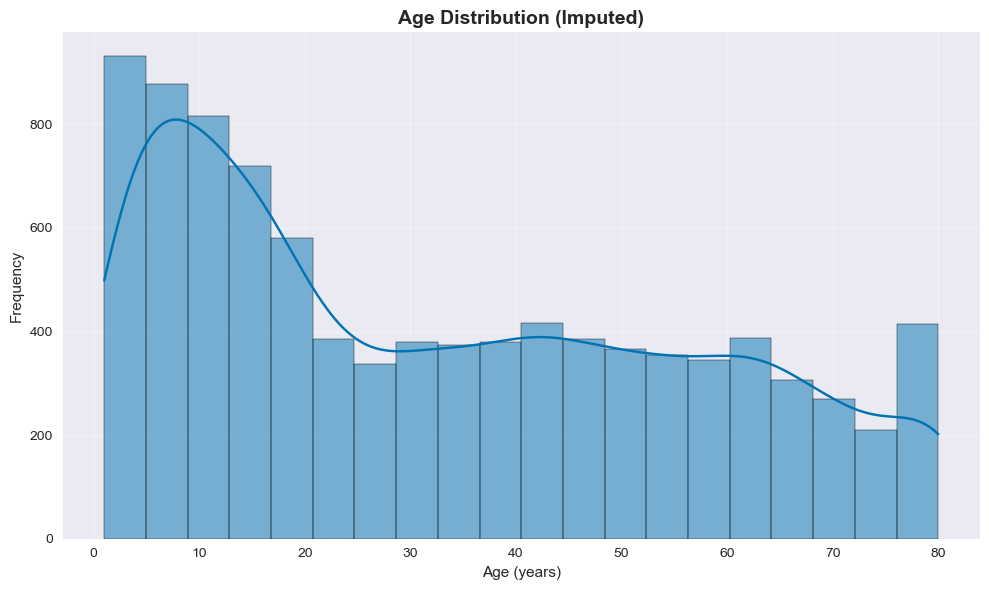

In [33]:


print("\nGenerating visualizations...")

# Set visualization style
plt.style.use('seaborn-v0_8')
sns.set_palette("colorblind")

# Figure 1: Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age_Imputed'], bins=20, kde=True)
plt.title('Age Distribution (Imputed)', fontsize=14, fontweight='bold')
plt.xlabel('Age (years)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

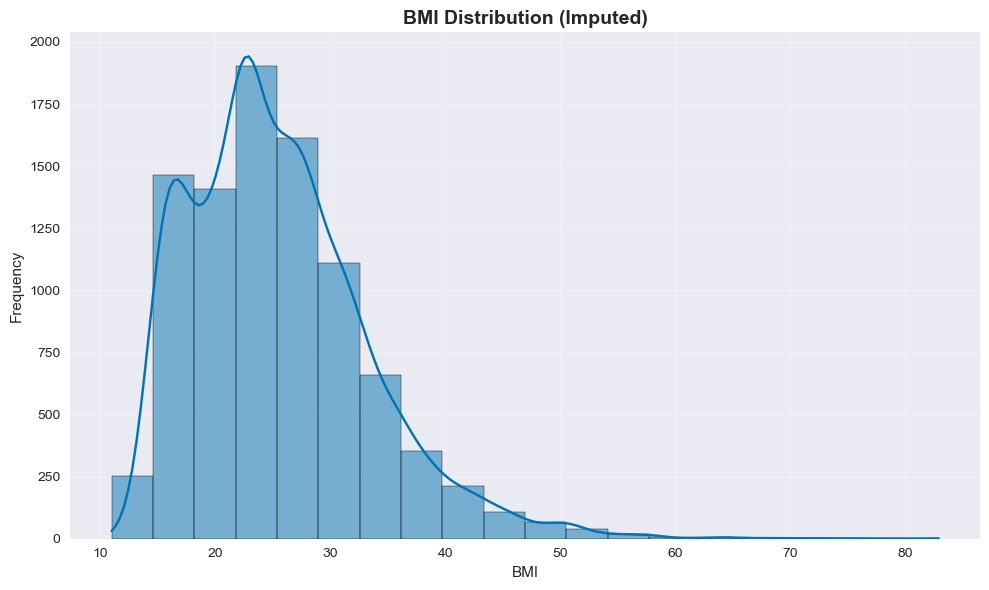

In [34]:


# Figure 2: BMI Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['BMI_Imputed'], bins=20, kde=True)
plt.title('BMI Distribution (Imputed)', fontsize=14, fontweight='bold')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

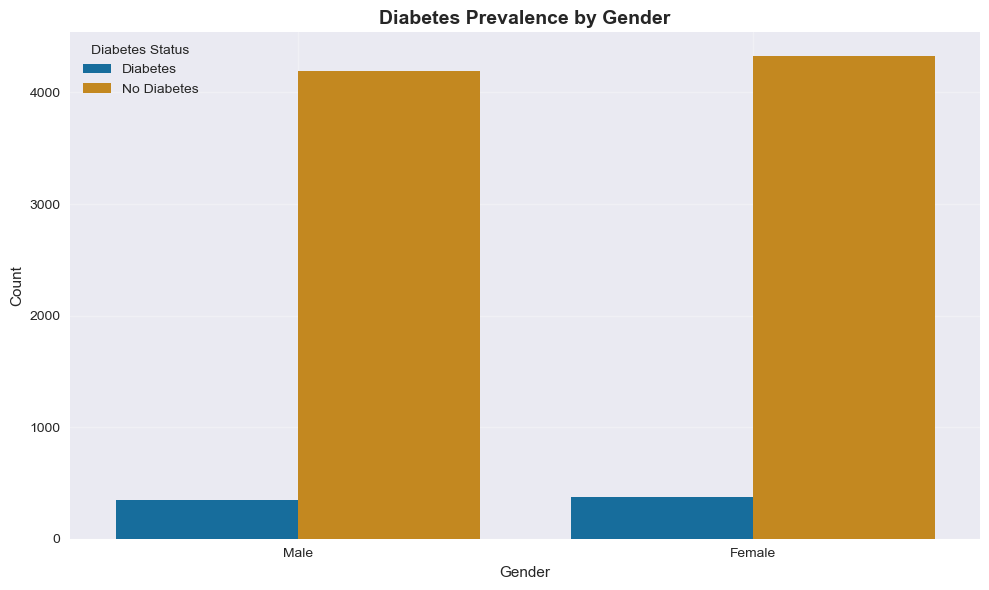

In [35]:


# Figure 3: Diabetes by Gender
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Gender', hue='Diabetes_Status')
plt.title('Diabetes Prevalence by Gender', fontsize=14, fontweight='bold')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Diabetes Status')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

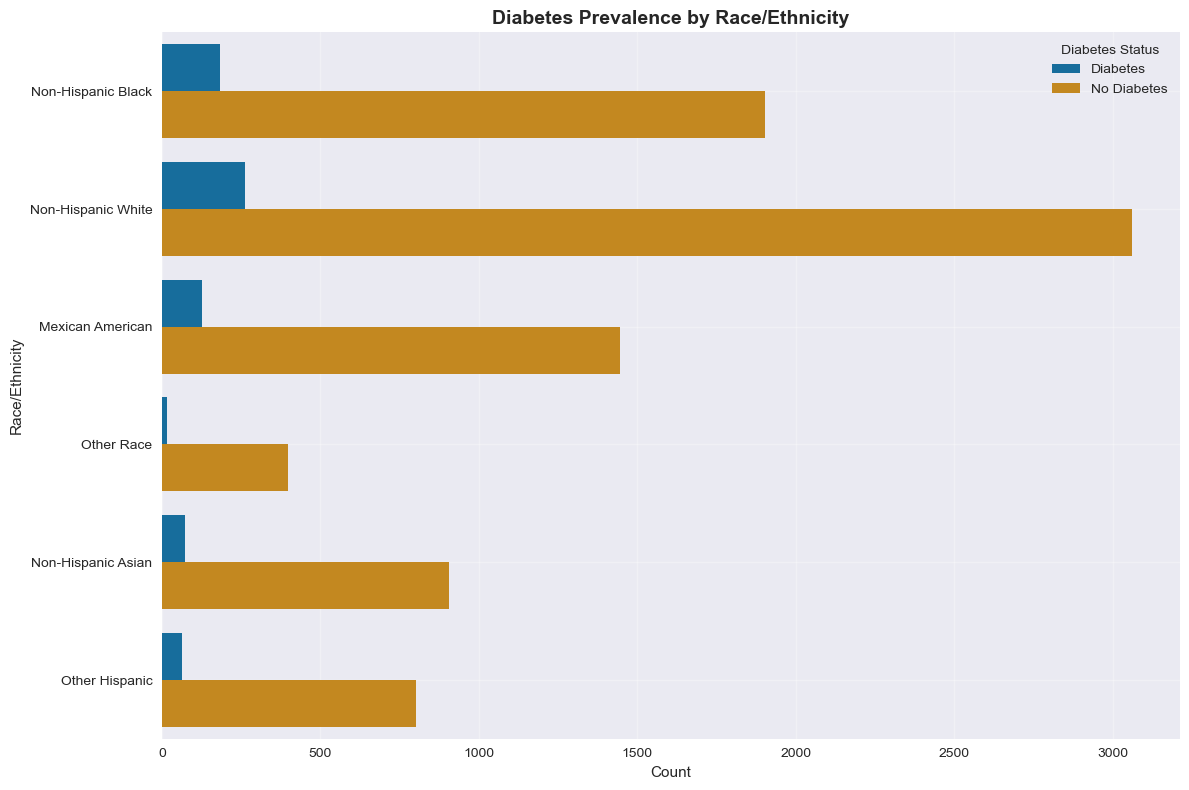

In [36]:


# Figure 4: Diabetes by Race
plt.figure(figsize=(12, 8))
sns.countplot(data=df, y='Race', hue='Diabetes_Status')
plt.title('Diabetes Prevalence by Race/Ethnicity', fontsize=14, fontweight='bold')
plt.xlabel('Count')
plt.ylabel('Race/Ethnicity')
plt.legend(title='Diabetes Status')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

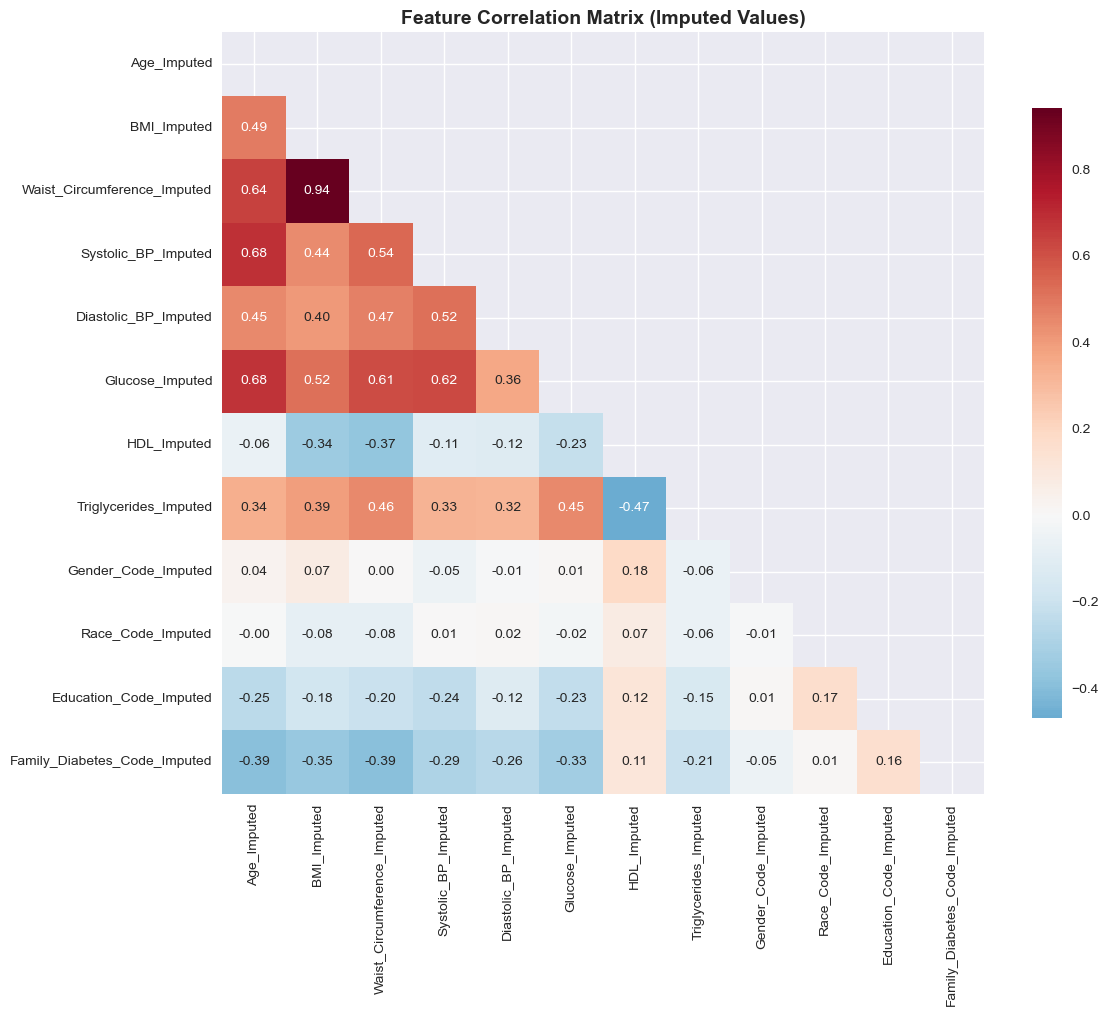

In [37]:


# Figure 5: Correlation Heatmap
plt.figure(figsize=(12, 10))
imputed_numeric_features = [col for col in df.columns if col.endswith("_Imputed") and col != 'Income_Code_Imputed']
correlation_matrix = df[imputed_numeric_features].corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', cmap='RdBu_r', center=0,
            square=True, cbar_kws={"shrink": .8})
plt.title('Feature Correlation Matrix (Imputed Values)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

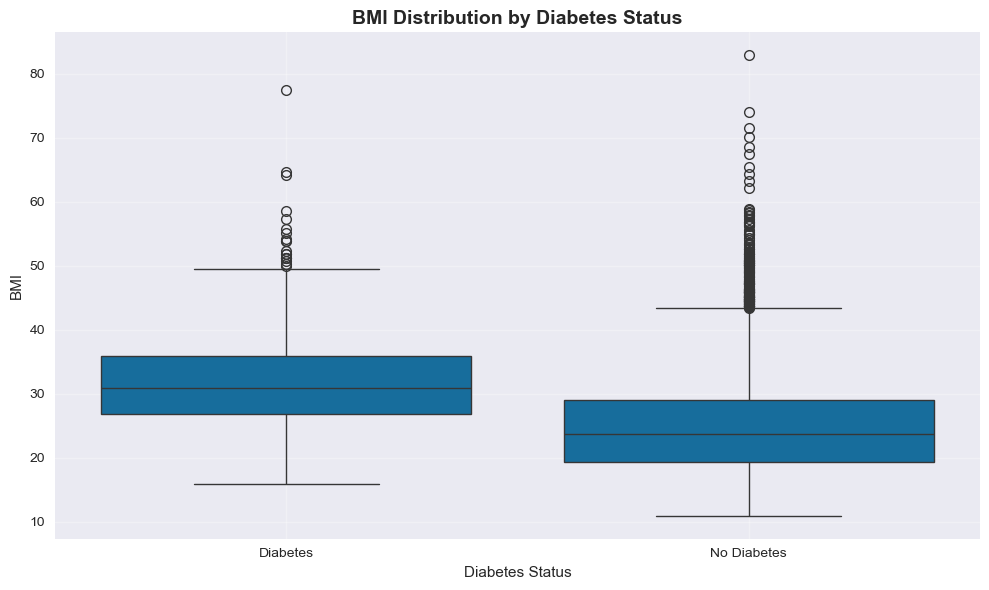

In [38]:


# Figure 6: BMI by Diabetes Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='Diabetes_Status', y='BMI_Imputed', data=df)
plt.title('BMI Distribution by Diabetes Status', fontsize=14, fontweight='bold')
plt.xlabel('Diabetes Status')
plt.ylabel('BMI')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()




--------------------------------------
                                                        Save Processed Data
--------------------------------------

In [39]:


# Save the processed dataset
output_path = 'nhanes_analysis.csv'
df.to_csv(output_path, index=False)
print(f"\nProcessed data saved to: {output_path}")
print(f"Final dataset shape: {df.shape}")


Processed data saved to: nhanes_analysis.csv
Final dataset shape: (9236, 50)


---------------------
                                                    Final Summary Statistics
------------------------

In [40]:
# Final summary statistics
print("\n" + "="*60)
print("FINAL SUMMARY STATISTICS")
print("="*60)

print(f"\nTotal participants: {len(df):,}")
print(f"Diabetes cases: {df[df['Diabetes_Status'] == 'Diabetes'].shape[0]:,}")
print(f"Non-diabetes cases: {df[df['Diabetes_Status'] == 'No Diabetes'].shape[0]:,}")
print(f"Diabetes prevalence: {(df['Diabetes_Status'] == 'Diabetes').mean():.2%}")

print(f"\nHigh risk individuals: {df[df['Risk_Level'] == 'High Risk'].shape[0]:,}")
print(f"Low risk individuals: {df[df['Risk_Level'] == 'Low Risk'].shape[0]:,}")

print(f"\nObesity status:")
print(f"Non-Obese: {df[df['Obesity_Status'] == 'Non-Obese'].shape[0]:,}")
print(f"Overweight: {df[df['Obesity_Status'] == 'Overweight'].shape[0]:,}")
print(f"Obese: {df[df['Obesity_Status'] == 'Obese'].shape[0]:,}")


FINAL SUMMARY STATISTICS

Total participants: 9,236
Diabetes cases: 722
Non-diabetes cases: 8,514
Diabetes prevalence: 7.82%

High risk individuals: 3,382
Low risk individuals: 5,854

Obesity status:
Non-Obese: 4,877
Overweight: 2,086
Obese: 2,273


In [41]:
# Key health metrics comparison
diabetes_metrics = df.groupby('Diabetes_Status')[
    ['BMI_Imputed', 'Waist_Circumference_Imputed', 'Glucose_Imputed', 'Triglycerides_Imputed']
].mean().round(2)

print(f"\nAverage health metrics by diabetes status:")
print(diabetes_metrics)



Average health metrics by diabetes status:
                 BMI_Imputed  Waist_Circumference_Imputed  Glucose_Imputed  \
Diabetes_Status                                                              
Diabetes               32.18                       109.54           139.57   
No Diabetes            24.91                        84.83           103.25   

                 Triglycerides_Imputed  
Diabetes_Status                         
Diabetes                        151.59  
No Diabetes                      94.22  


# 🩺 NHANES Diabetes Analysis – Insights & Recommendations

## 1. Average Health Metrics by Diabetes Status
| Metric                     | Diabetes | No Diabetes |
|-----------------------------|----------|-------------|
| **BMI (kg/m²)**            | 32.18    | 24.91       |
| **Waist Circumference (cm)** | 109.54   | 84.83       |
| **Glucose (mg/dL)**        | 139.57   | 103.25      |
| **Triglycerides (mg/dL)**  | 151.59   | 94.22       |

✅ People with **diabetes** show **higher BMI, waist circumference, glucose, and triglyceride levels**, all known risk factors.


## 2. BMI Differences by Gender & Diabetes Status
- **Males**
  - Diabetes: **31.20**
  - No Diabetes: **24.36**

- **Females**
  - Diabetes: **33.10**
  - No Diabetes: **25.45**

⚠️ Diabetic females show **slightly higher BMI** than diabetic males, suggesting stronger obesity-diabetes linkage in women.


## 3. Obesity & Income Relationship
| Obesity Status | Avg. Income Code |
|----------------|------------------|
| Non-Obese      | 51,703.92             |
| Overweight     | 53,530.68             |
| Obese          | 48,522.88             |

📉 Obese individuals tend to have **slightly lower income levels** compared to non-obese.


## 4. Education vs Income (Diabetes Patients Only)
| Education Level             | Avg. Income (USD)  |
|-----------------------------|--------------------|
| Less than 9th grade         | 33,137             |
| 9–11th grade                | 37,198             |
| High school graduate        | 43,070             |
| Some college / AA degree    | 48,269             |
| College graduate            | 71,782             |

📚 Higher education is linked with **higher income levels** even among people with diabetes.


## 5. Population Distribution
- **Diabetes prevalence**
  - Diabetes: **722**
  - No Diabetes: **8,514**

- **Risk Levels**
  - High Risk: **3,382**
  - Low Risk: **5,854**

- **Obesity Status**
  - Non-Obese: **4,877**
  - Overweight: **2,086**
  - Obese: **2,273**

⚠️ Most participants are **non-diabetic**, but **over 3,300 individuals are at high risk**, and obesity is strongly present.

---

# ✅ Key Insights
1. **Diabetes is strongly associated** with higher BMI, waist size, glucose, and triglycerides.  
2. **Females with diabetes** tend to have higher BMI compared to diabetic males.  
3. **Income and education** play protective roles: higher education = higher income = potentially lower diabetes risk.  
4. **Obesity is widespread** and strongly overlaps with diabetes and high-risk groups.  

---

# 💡 Recommendations
- **Targeted Interventions**: Focus on **obese and overweight individuals**, especially women, for diabetes prevention.  
- **Education & Awareness**: Promote **health literacy programs** in lower-education groups.  
- **Socioeconomic Focus**: Consider income-linked strategies, as low-income populations show worse health outcomes.  
- **Preventive Screenings**: Increase glucose and cholesterol screenings for high-risk groups.  
- **Lifestyle Programs**: Encourage **weight management, physical activity, and balanced diets** to reduce risks.  
👉 This way, your notebook will have both tables + narrative insights + recommendations in Markdown, without clutter.




--------------------------------
                                                            Project Information
--------------------------------

In [42]:



print("\n" + "="*60)
print("PROJECT INFORMATION")
print("="*60)
print("Project: NHANES Diabetes Predictive Analysis")
print("Description: Comprehensive analysis of diabetes risk factors using NHANES data")
print("Data Source: National Health and Nutrition Examination Survey")
print("Author: Rotimi Sheriff Omosewo")
print("Contact: omoseworotimi@gmail.com")
print("GitHub: https://github.com/rotimi2020")
print("LinkedIn: https://www.linkedin.com/in/rotimi-sheriff-omosewo-939a806b/")


PROJECT INFORMATION
Project: NHANES Diabetes Predictive Analysis
Description: Comprehensive analysis of diabetes risk factors using NHANES data
Data Source: National Health and Nutrition Examination Survey
Author: Rotimi Sheriff Omosewo
Contact: omoseworotimi@gmail.com
GitHub: https://github.com/rotimi2020
LinkedIn: https://www.linkedin.com/in/rotimi-sheriff-omosewo-939a806b/
